# NE 630 - Lesson 38

**LAST TIME**:  The reflected reactor.

**TODAY**: Modeling reactor control (and control "worth").

**NEXT TIME**:  When is "diffusion theory" a good approximation? (Read 6.6)

# Review: Reflector Savings

For our **bare** reactor, we needed to satisfy the criticality condition

$$
  \cot{\frac{Ba}{2}} = 2BD_I  \, .
$$

and for $D_I = 1$ cm, $\Sigma_a = 0.1$ 1/cm, $k_{\infty} = 1.3$, and $a = 50$ cm, we found

$$
B^2 = 0.003387 \qquad \text{and} \qquad  k = 1.25741 \, .
$$

For the **reflected** reactor (with an *infinitely thick reflector*), we found the modified criticality condition

$$
  a' = \frac{2 \operatorname{atan}{\left(\frac{D_{II}}{B D_{I} L_{II}} \right)}}{B}
$$

where $a'$ is the width of the reflected reactor (and $a$ is the width of the bare reactor).

In [1]:
import numpy as np
D_I = 1.0; Σ_a_I = 0.1;   L_I = np.sqrt(D_I/Σ_a_I);  k_oo = 1.3;
D_II = 0.9; Σ_a_II = 0.01; L_II = np.sqrt(D_II/Σ_a_II); a = 50;
B_bare = np.sqrt(0.003387)

In [2]:
a_prime = np.arctan(D_II/(B_bare*D_I*L_II))/B_bare
print(f"a' = {a_prime:.4f} cm")

a' = 17.5356 cm


The key point: $a' = 17.5356$ cm is *much less than* $a = 50$ cm for the same value of $B^2$ (and, hence, $k$).

The book defines the **reflector savings** specifically as $\delta_x = (1/2)(a-a')$, so our savings would be

In [3]:
print(f"reflector savings = {0.5*(a-a_prime):.4f} cm")

reflector savings = 16.2322 cm


The approximation $\delta_z \approx \hat{M}D/\hat{D}$ becomes $\delta_x \approx L_{II} D_I / D_{II}$ in our one-group model and gives

In [4]:
print(f"reflector savings ≈ {L_II*D_I/D_II:.4f} cm") 

reflector savings ≈ 10.5409 cm


# Modeling Control



(Active) reactor control comes from a change in $\Sigma_a \rightarrow \Sigma_a + \delta \Sigma_a$ via

  - Soluble poison (a *uniform* change in $\Sigma_a$)
  - Control rods (a *local* change in $\Sigma_a$)

What we want is $\delta \rho = \frac{k'-k}{k'k} \approx \frac{k'-k}{k'}$  given $\delta \Sigma_a$.  (Usually, $k=1$!)

Method 1: Just resolve the problem using $\Sigma_a = \Sigma_a+\delta \Sigma_a$ to get $k'$!  This is called a **direct perturbation** and produces the exact result.

Method 2: Use "naïve" perturbation theory to *estimate* $\delta\rho$.

Method 3: Use first-order perturbation theory to *estimate* $\delta\rho$.

# Naïve Perturbation Theory

Because we're trying to find $\delta \rho$ or, equivalently, the new eigenvalue $k'$, it helps to return to the basics:  what *is* $k$?  Gains to losses.

For a bare slab of width $a$, we can write

$$
  k = \frac{\text{gains}}{\text{losses}} = 
  \frac{\int^{a/2}_{-a/2} \nu\Sigma_f(x) \phi(x) dx}
       {\int^{a/2}_{-a/2} \Sigma_a(x) \phi(x) dx + \text{leakage}} \, .
$$

Because the reactor is bare, there should be no neutrons *entering* the reactor and, hence, the leakage should be the sum of the currents exiting the left and right sides, or $-D \phi'(a/2) + D \phi'(-a/2)$ (note the signs!).

The naïve approach would simply substitute $\Sigma_a = \Sigma_a + \delta \Sigma_a$ into this equation to find

$$
  k' \approx
  \frac{\int^{a/2}_{-a/2} \nu\Sigma_f(x) \phi(x) dx}
       {\int^{a/2}_{-a/2} (\Sigma_a(x)+\delta \Sigma_a(x)) \phi(x) dx + \text{leakage}} \, ,
$$

and

$$
 \delta \rho = \frac{k'-1}{k'} - \frac{k-1}{k} = \frac{k'-k}{k'k} \approx
- \frac{ \displaystyle \int_{a/2}^{-a/2} 
   \delta\Sigma_a(x) \phi(x) dx}
   { \displaystyle \int_{-a/2}^{a/2}  \nu\Sigma_f(x) \phi(x) dx}
   \tag{1}
$$

While this provides an estimate, it can't be totally right: a nonuniform $\Sigma_a$ would yield a flux with a shape more complicated than a single cosine term!  

# First-Order Perturbation Theory

The basic idea of perturbation theory is to *weight* a change in, e.g., $\Sigma_a$, by the *importance* of that change.

This *importance* is represented by the function $\phi^*(x)$ called the *adjoint flux*.

For a change $\delta \Sigma_a(x)$ and $\delta \nu\Sigma_f(x)$, the result is

$$
\delta \rho \approx - \frac{ \displaystyle \int_{-a/2}^{a/2} \phi^*(x) 
   \left(\delta\Sigma_a(x)- \frac{\delta \nu\Sigma_f(x)}{k} \right) \phi(x) dx}
   { \displaystyle \int_{-a/2}^{a/2} \phi^*(x) \nu\Sigma_f(x) \phi(x) dx}
\tag{2}
$$

As it turns out, the one-group diffusion equation is "self adjoint" and $\phi^* = \phi$, and Eq. (2) looks a lot like Eq. (7.82) in the book.  Compared to (1), Eq. (2) preferentially weights the absorption rate in regions where the flux is largest, which corresponds to regions in which the fission rate is largest. Hence, the impact of control is larger in high-flux (high-importance) regions.  We will be exploring this via measurements in NE 648.

Note: For other coordinate systems, the integrals above may be over *radius* or entire *volumes*---be careful!

Again, this provides an *estimate*.  Here, a change in $\Sigma_a$ near the boundary (where $\phi(x)$ is *lower*) will

# Worked Example

Consider our favorite bare slab reactor of width $a$ with given $D$, $\Sigma_a$, and $\nu\Sigma_f$.  Let's compute the change in $k$ when we perturb $\Sigma_a \to \Sigma_a + \delta \Sigma_a$ by  (a) naïve perturbation theory, (b) first-order perturbation theory, and (c) direct perturbation. 

As a specific, nontrivial example, we'll assume that in the right third of the slab (i.e., $x = a/6$ to $x = a/2$), our absorption cross section increases by 10% to $\Sigma_a = 0.11$. 

First, define the baseline case:

In [5]:
# Here is our baseline value of k = k_0
import numpy as np
D = 1.0; Σ_a = 0.1; vΣ_f=1.3*0.1; k_oo = vΣ_f/Σ_a; L = np.sqrt(D/Σ_a); a=50;
cot = lambda x: np.cos(x)/np.sin(x)
f = lambda B: cot(B*a/2)-2*B*D
from scipy.optimize import fsolve
B_0 = fsolve(f, np.pi/a)[0]
k_0 = k_oo / (1+L**2*B_0**2);
print(f"B^2 = {B_0**2:.6f}   k = {k_0:.5f}")

B^2 = 0.003387   k = 1.25741


Just to make sure we're truly balanced, let's compute compute gains and losses.  The neutron production and absorption rates require the integral of the flux, or

$$
 \displaystyle\int^{a/2}_{-a/2}\phi(x) = C\cos(Bx) dx = \frac{2C}{B}\sin(Ba/2) \, .
$$

The leakage requires its derivative at either boundary, or

$$
  \frac{d\phi}{dx}\Big |_{x=\pm a/2} = \mp CB\sin(Ba/2) \, .
$$

Then, 

$$
  k_0 = \frac{R_n}{R_a + R_{leak}} = \frac{\nu\Sigma_f \frac{2C}{B}\sin(Ba/2) } 
  { \Sigma_a   \frac{2C}{B}\sin(Ba/2)  + 2D C B \sin(Ba/2) } 
   = \frac{\nu\Sigma_f }
  { \Sigma_a  + D  B^2  } = \frac{k_{\infty}}{1 + L^2 B^2} \, .
$$

Here, we use $k_0$ to indicate the initial value of $k$ for this unperturbed case.

**(a) Naïve Perturbation Theory**

Now, integrate the absorption-rate change by computing

$$
\begin{split}
  \delta R_a &= \displaystyle\int^{a/2}_{-a/2} \delta \Sigma_a(x) \phi(x) dx \\
  &=
    \displaystyle\int^{a/6}_{-a/2} 0 C\cos(Bx) dx 
     + \displaystyle\int^{a/2}_{a/6} \delta\Sigma_a C\cos(Bx) dx \\
  &=
   \frac{C}{B} \big( [\sin(Ba/2) - \sin(Ba/6)] \delta \Sigma_a \big) \\
\end{split}
$$

Then

$$
\delta \rho_{np} = -\frac{ \frac{C}{B} \big( [\sin(Ba/2) - \sin(Ba/6)] \delta \Sigma_a \big)  }
  {\nu\Sigma_f \frac{2C}{B}\sin(Ba/2)} = -\frac{ \left( 1- \displaystyle\frac{\sin(Ba/6)}{\sin(Ba/2)} \right )  \delta \Sigma_a   }
  {2 \nu\Sigma_f  }
$$

and

$$
  k_1 \approx \frac{k_0}{1-k_0 \delta \rho_{np}} \, .
$$


In [6]:
δΣ_a = 0.01
δρ_np = -(1-np.sin(B_0*a/6)/np.sin(B_0*a/2))*δΣ_a/(2*vΣ_f)
k_1 = k_0/(1-k_0*δρ_np)
print(f"δρ_np = {δρ_np:.5f}  k_1 = {k_1:.5f}")

δρ_np = -0.02041  k_1 = 1.22595


**(b) First-Order Perturbation Theory**

Nearly the same procedure is used for the first-order perturbation theory, except now

$$
\begin{split}
\delta \rho_{pt} &\approx - 
\frac{ \displaystyle   \displaystyle\int^{a/6}_{-a/2} 0 C\cos^2(Bx) dx 
     + \displaystyle\int^{a/2}_{a/6} \delta\Sigma_a C\cos^2(Bx) dx }
   { \displaystyle   \displaystyle\int^{a/2}_{-a/2} \nu\Sigma_f C\cos^2(Bx) dx } \\
   &=  \frac{\delta\Sigma_a}{\nu\Sigma_f} \left ( \displaystyle \frac{\frac{B a}{3} - \frac{\sin{\left(\frac{B a}{3} \right)}}{2} + \frac{\sin{\left(B a \right)}}{2}}{B a + \sin{\left(B a \right)}} \right ) \, .
\end{split}
$$

In [7]:
δρ_pt = -δΣ_a/vΣ_f * ((B_0*a/3 - np.sin(B_0*a/3)/2 + np.sin(B_0*a)/2)/(B_0*a+np.sin(B_0*a)))
k_1 = k_0/(1-k_0*δρ_pt)
print(f"δρ_np = {δρ_pt:.5f}  k_1 = {k_1:.5f}")

δρ_np = -0.01647  k_1 = 1.23189


**Food for thought**: This is a *lower* estimate of $\delta\rho$. What does this say about the effectiveness of putting a control rod near the boundary of our bare core?

**Food for thought**: When $\Sigma_a$ changes, so, too, must $\Sigma_t$, $\Sigma_{tr}$, and $D$.  However, this effect is neglected in the derivation of the perturbation result. We could explore this impact, too, below, but how do you suspect setting $D' = \frac{1}{3(\Sigma_{tr} + \delta\Sigma_a)} \approx \frac{1}{3\Sigma_{tr}}-\frac{\delta\Sigma_a}{3\Sigma_{tr}^2} = D - 3 D^2\delta \Sigma_a$ would change things?

**(c) Direct Perturbation**

To solve this problem, we first need to "guess" what the correct flux form should be in each region.  Obviously, we can *always* use exponentials, but depending on the magnitude of the region-wise $\nu\Sigma_f/k$ and $\Sigma_a$, it may be best to use trigonometric functions or their hyperbolic analogs.  

It might seem at first obvious to use only sines and cosines since we have multiplication in each region and we expect the reactor to have $k > 1$ based on the $\delta \rho$ values above, i.e., 

$$
  k_1  \approx 1.20739 \, .
$$

With this value of $k$, the region I buckling remains positive:

$$
  B_{I}^2 \approx \frac{\nu\Sigma_f/k_1-\Sigma_a}{D} \approx 0.0055 \, .
$$

In [8]:
(vΣ_f/k_1-Σ_a)/D

0.005528480171629352

Hence, the region I flux can be written as

$$
  \phi_I(x) = \cos(B_I x) + C_2 \sin(B_I x) \, ,
$$

where $C_1$ has been set immediately to 1.  We can do this because the flux is unique only to with a multiplicative constant, i.e., we can normalize it any way we like. 


For region II, we estimate that 

$$
  B_{II}^2 = \frac{\nu\Sigma_f/k'-\Sigma_a-\delta\Sigma_a}{D} \approx -0.0045 \, .
$$


In [9]:
(vΣ_f/k_1-Σ_a-δΣ_a)/D

-0.004471519828370648


Hence, we instead define 


$$
  \alpha_{II}^2 = -B_{II}^2 = -\frac{\nu\Sigma_f/k'-\Sigma_a-\delta\Sigma_a}{D} \, 
$$

and write 

$$
  \phi_{II}(x) = C_3 \cosh(B_{II} x) + C_4 \sinh(B_{II} x) \, .
$$


Our boundary conditions remain vacuum, while our interface conditions are the usual flux and current continuity conditions.  All of that follows in some SymPy code:

In [10]:
import sympy as sy
D, a, Σ_a, δΣ_a, vΣ_f = sy.symbols('D, a, Sigma_a, \delta\Sigma_a, \nu\Sigma_f', real=True)
x, k, B_I, α_II = sy.symbols("x, k, B_I, alpha_II", real=True)

C2, C3, C4 = sy.symbols("C2, C3, C4")
phi_I = sy.cos(B_I*x) + C2*sy.sin(B_I*x)
phi_II = C3*sy.cosh(α_II*x) + C4*sy.sinh(α_II*x)

In [11]:
bcL = sy.Eq(phi_I.subs(x, -a/2)/4 - (D/2)*sy.diff(phi_I, x).subs(x, -a/2), 0).simplify()
coef2= sy.solve(bcL, C2)[0]
phi_I_sub = phi_I.subs(C2, coef2).simplify()
sy.Eq(sy.Function('phi_I')(x), phi_I_sub)

Eq(phi_I(x), (2*B_I*D*cos(B_I*(a/2 + x)) + sin(B_I*(a/2 + x)))/(2*B_I*D*cos(B_I*a/2) + sin(B_I*a/2)))

In [12]:
bcR = sy.Eq(phi_II.subs(x, a/2)/4 + (D/2)*sy.diff(phi_II, x).subs(x, a/2), 0).simplify()
coef4 = sy.solve(bcR, C4)[0]
phi_II_sub = phi_II.subs(C4, coef4).simplify()
sy.Eq(sy.Function('phi_II')(x), phi_II_sub)

Eq(phi_II(x), C3*(2*D*alpha_II*cosh(alpha_II*(a/2 - x)) + sinh(alpha_II*(a/2 - x)))/(2*D*alpha_II*cosh(a*alpha_II/2) + sinh(a*alpha_II/2)))

Before we can determine $C_3$, we need to determine $k$.  As we did for the reflected reactor, we can divide the current continuity equation by the flux continuity equation to find the following criticality condition:

In [13]:
LHS = (-sy.diff(D*phi_I_sub, x)/phi_I_sub).subs(x, a/6).simplify() 
RHS = (-sy.diff(D*phi_II_sub, x)/phi_II_sub).subs(x, a/6).simplify()
crit_cond = sy.Eq(LHS, RHS)
crit_cond

Eq(B_I*D*(2*B_I*D*sin(2*B_I*a/3) - cos(2*B_I*a/3))/(2*B_I*D*cos(2*B_I*a/3) + sin(2*B_I*a/3)), D*alpha_II*(2*D*alpha_II*sinh(a*alpha_II/3) + cosh(a*alpha_II/3))/(2*D*alpha_II*cosh(a*alpha_II/3) + sinh(a*alpha_II/3)))

Now, substitute the relationships between the buckling terms and $k$, and then substitute the numerical values for all parameters to produce a single nonlinear equation for $k$.  We can plot both sides to confirm our root is near $k = 1.21598$ (as predicted with the first-order perturbation theory), and then finally use `fsolve` to get the precise value.

In [14]:
buckling = {B_I: sy.sqrt((vΣ_f/k-Σ_a)/D), α_II: sy.sqrt(-(vΣ_f/k-(Σ_a+δΣ_a))/D)}
num_data = {D: 1.0, Σ_a: 0.1, δΣ_a: 0.01, vΣ_f: 1.3*0.1, a: 50}
cc = crit_cond.subs(buckling).subs(num_data)

In [15]:
cc.rhs

0.360555127546399*sqrt(0.846153846153846 - 1/k)*(0.721110255092798*sqrt(0.846153846153846 - 1/k)*sinh(6.00925212577332*sqrt(0.846153846153846 - 1/k)) + cosh(6.00925212577332*sqrt(0.846153846153846 - 1/k)))/(0.721110255092798*sqrt(0.846153846153846 - 1/k)*cosh(6.00925212577332*sqrt(0.846153846153846 - 1/k)) + sinh(6.00925212577332*sqrt(0.846153846153846 - 1/k)))

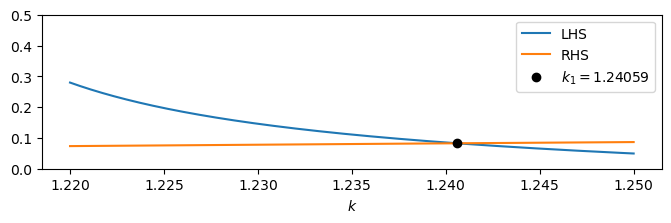

In [16]:
lhs = sy.lambdify(k, cc.lhs)
rhs = sy.lambdify(k, cc.rhs)
import matplotlib.pyplot as plt


k_1 = fsolve(lambda k: lhs(k)-rhs(k), 1.21598)[0]

k_vals = np.linspace(1.22, 1.25, 1000)
plt.figure(figsize=(8,2))
plt.plot(k_vals, lhs(k_vals), k_vals, rhs(k_vals), k_1, rhs(k_1), 'ko')
plt.ylim(0, 0.5)
plt.xlabel("$k$")
plt.legend(["LHS", "RHS", f"$k_1={k_1:.5f}$"]);

The actual reactivity worth is, therefore,

$$
  \delta \rho = \frac{k_1-k_0}{k_1 k_0} \approx -0.01079 \, ,
$$

which is even *smaller* than the first-order perturbation theory estimate of $\rho_{pt} = -0.01647$ and naïve estimate of $\rho_{np} = -0.02041$.

So, to conclude, first-order perturbation theory gives us a better estimate than the naïve approach for about the same amount of work, and for much less work than the direct perturbation result.

One might have hoped for a "better" estimate, but consider again our perturbation, which was a 10% increase in $\Sigma_a$ in one third of the core.  That may seem small, but it has a profound impact on the flux, which went from a pure cosine to a mixed shape involving several functions. 

As a final step, let's plot the original and perturbed fluxes.  For the perturbed flux, we still need $C_3$, which we can get using flux continuity:

In [17]:
cc_flux = sy.Eq(phi_I_sub.subs(x, a/6), phi_II_sub.subs(x, a/6))
coef3 = sy.solve(cc_flux, C3)[0]
phi_I_num = sy.lambdify(x, phi_I_sub.subs(buckling).subs(num_data).subs(k, k_1))
phi_II_num = sy.lambdify(x, phi_II_sub.subs(C3, coef3).subs(buckling).subs(num_data).subs(k, k_1))

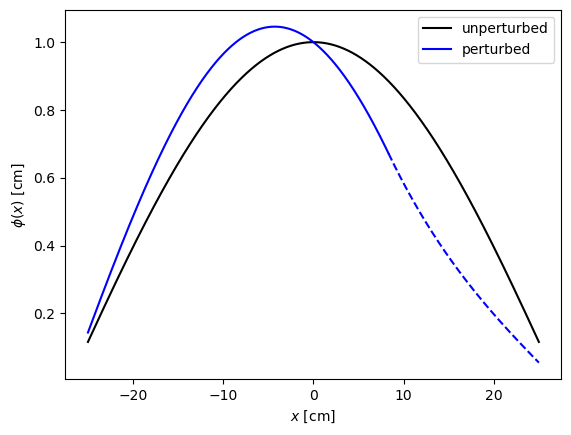

In [18]:
x_full = np.linspace(-25, 25, 2000)
plt.plot(x_full, np.cos(B_0*x_full), 'k')

x_I = np.linspace(-25, 50/6, 1000)
x_II = np.linspace(50/6, 25, 1000)
plt.plot(x_I, phi_I_num(x_I), 'b')
plt.plot(x_II, phi_II_num(x_II), 'b--')

plt.legend(['unperturbed', 'perturbed'])
plt.xlabel("$x$ [cm]")
plt.ylabel("$\phi(x)$ [cm]");